# Large Multimodal Models (LMMs)

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
%pip install -qU google-genai

## Setup
### Load environment variables and API keys

In [34]:
from google import genai  # from the google-genai package
from google.colab import userdata, drive
drive.mount('/content/drive')

# Load your API key stored in Colab's secret manager
GOOGLE_API_KEY = userdata.get('googleAPI')

# Initialize the Gemini client
client = genai.Client(api_key=GOOGLE_API_KEY)

# Choose the model
MODEL_ID = "gemini-2.5-flash"  # or any from the list


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Helper functions

In [35]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


* Function to call LMM (Large Multimodal Model).

In [36]:
def call_LMM(image_path: str, prompt: str) -> str:
    # Load the image
    image = PIL.Image.open(image_path)

    # Generate content using the correct google-genai v1 syntax
    response = client.models.generate_content(
        model=MODEL_ID,
        contents=[prompt, image],  # ✅ just a list of text + image
    )

    return response.text


## Analyze images with an LMM

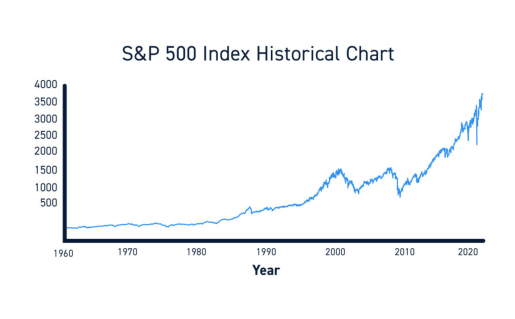

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picture = '/content/drive/My Drive/Colab Notebooks/SP-500-Index-Historical-Chart.jpg'
img = mpimg.imread(picture)
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [38]:
# Use the LMM function
call_LMM(picture, "Explain what you see in this image.")

'This image displays a line graph titled "S&P 500 Index Historical Chart," showing the performance of the S&P 500 index over approximately 60 years, from 1960 to 2020.\n\nHere\'s a breakdown of what the chart shows:\n\n1.  **Axes:**\n    *   **X-axis (horizontal):** Represents "Year," ranging from 1960 to 2020, with major tick marks every 10 years.\n    *   **Y-axis (vertical):** Represents the S&P 500 index value, ranging from 500 to 4000, with tick marks every 500 points.\n\n2.  **Overall Trend:**\n    *   The most prominent feature is a significant **long-term upward trend** in the S&P 500 index. The index starts at a relatively low value (around 100-200 points in 1960) and ends at a much higher value (over 3500 points in 2020).\n\n3.  **Specific Periods and Movements:**\n    *   **1960s - Early 1980s:** The index shows relatively slow growth, fluctuating mostly between 100 and 300 points. There are periods of stagnation and minor dips.\n    *   **Mid-1980s - Late 1990s:** A period 

## Analyze a harder image

* Try something harder: Here's a figure we explained previously!

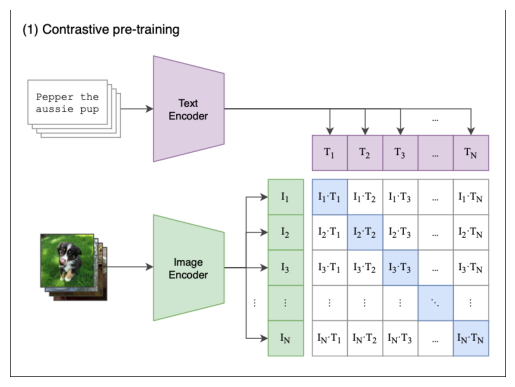

In [39]:
picture = '/content/drive/My Drive/Colab Notebooks/clip.png'
img = mpimg.imread(picture)
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [40]:
call_LMM(picture, "Explain what you see in this image.")

'This image illustrates the process of **(1) Contrastive pre-training**, a common technique in multimodal machine learning, particularly for training models that understand both images and text.\n\nHere\'s a breakdown of what\'s happening:\n\n1.  **Inputs:**\n    *   **Text Data:** On the top left, there\'s a stack of text inputs, represented by grey rectangles. One example is "Pepper the aussie pup," indicating captions or descriptions for images.\n    *   **Image Data:** On the bottom left, there\'s a stack of image inputs, with one clearly showing a puppy. These images are presumably related to the text captions (e.g., the image of "Pepper" the puppy).\n\n2.  **Encoders:**\n    *   **Text Encoder (Purple Trapezoid):** This is a neural network model designed to process text input. It takes the textual descriptions (e.g., "Pepper the aussie pup") and transforms them into numerical representations called **text embeddings** (`T1, T2, T3, ..., TN`). These embeddings capture the semantic